### Exploratory Data Analysis

Import packages

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
from pandas.plotting import scatter_matrix

Load cleaned data

In [35]:
df_data = pd.read_csv("../dataset/cleaned_data.csv")
df_data.head()

,date,home,away,home_goal,away_goal,home_shot,away_shot,home_shot_on_goal,away_shot_on_goal,home_possession_pct,away_possession_pct,home_corner,away_corner,result
0,2013-01-02,Newcastle United,Everton,1,2,17,13,5,6,0.50,0.50,4,6,0
1,2013-01-02,Liverpool,Sunderland,3,0,29,8,10,2,0.66,0.34,9,5,3
2,2013-01-02,Chelsea,Queens Park Rangers,0,1,26,7,2,3,0.64,0.36,14,2,0
3,2013-01-01,Southampton,Arsenal,1,1,9,6,5,1,0.44,0.56,3,3,1
4,2013-01-12,Sunderland,West Ham United,3,0,18,11,7,3,0.48,0.52,4,5,3


Brief information about data

In [36]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3764 entries, 0 to 3763
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   date                 3764 non-null   object 
 1   home                 3764 non-null   object 
 2   away                 3764 non-null   object 
 3   home_goal            3764 non-null   int64  
 4   away_goal            3764 non-null   int64  
 5   home_shot            3764 non-null   int64  
 6   away_shot            3764 non-null   int64  
 7   home_shot_on_goal    3764 non-null   int64  
 8   away_shot_on_goal    3764 non-null   int64  
 9   home_possession_pct  3764 non-null   float64
 10  away_possession_pct  3764 non-null   float64
 11  home_corner          3764 non-null   int64  
 12  away_corner          3764 non-null   int64  
 13  result               3764 non-null   int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 411.8+ KB


In [37]:
df_data.describe()

,home_goal,away_goal,home_shot,away_shot,home_shot_on_goal,away_shot_on_goal,home_possession_pct,away_possession_pct,home_corner,away_corner,result
count,3764.000000,3764.000000,3764.000000,3764.000000,3764.000000,3764.000000,3764.000000,3764.000000,3764.000000,3764.000000,3764.000000
mean,1.520723,1.216525,13.946334,11.354942,4.700584,3.901435,0.508526,0.484564,5.789851,4.685175,1.576249
std,1.317454,1.183927,5.819208,5.004378,2.659504,2.325061,0.128201,0.127552,3.134795,2.755418,1.332869
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,10.000000,8.000000,3.000000,2.000000,0.420000,0.390000,4.000000,3.000000,0.000000
50%,1.000000,1.000000,13.000000,11.000000,4.000000,4.000000,0.510000,0.490000,5.000000,4.000000,1.000000
75%,2.000000,2.000000,17.000000,14.000000,6.000000,5.000000,0.610000,0.570000,8.000000,6.000000,3.000000
max,9.000000,9.000000,43.000000,38.000000,17.000000,15.000000,0.830000,0.820000,19.000000,19.000000,3.000000


When a football club play at home, the goals, shots, shots on goal or possession is always better than away match

<AxesSubplot: >

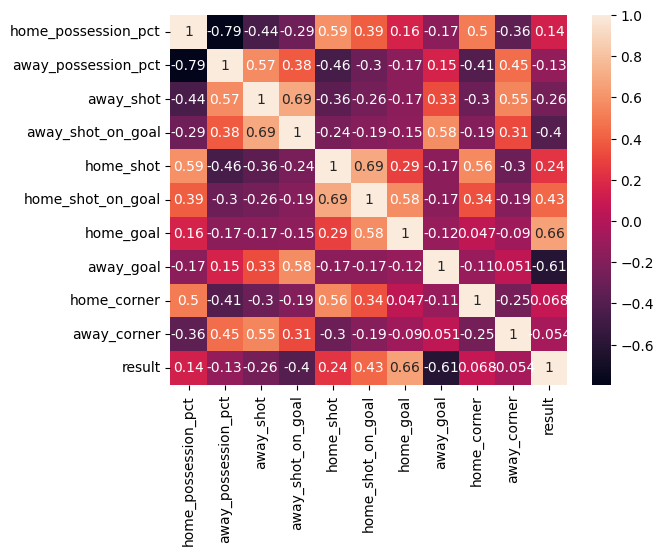

In [38]:
cols = ['home_possession_pct', 'away_possession_pct', 'away_shot', 'away_shot_on_goal', 'home_shot', 'home_shot_on_goal', 
    'home_goal', 'away_goal', 'home_corner', 'away_corner', 'result']
info = df_data[cols]
sns.heatmap(info.corr(), annot=True)

We can drop home_corner and away_corner when we consider result

array([[<AxesSubplot: xlabel='home_possession_pct', ylabel='home_possession_pct'>,
        <AxesSubplot: xlabel='away_possession_pct', ylabel='home_possession_pct'>,
        <AxesSubplot: xlabel='away_shot', ylabel='home_possession_pct'>,
        <AxesSubplot: xlabel='away_shot_on_goal', ylabel='home_possession_pct'>,
        <AxesSubplot: xlabel='home_shot', ylabel='home_possession_pct'>,
        <AxesSubplot: xlabel='home_shot_on_goal', ylabel='home_possession_pct'>,
        <AxesSubplot: xlabel='home_goal', ylabel='home_possession_pct'>,
        <AxesSubplot: xlabel='away_goal', ylabel='home_possession_pct'>,
        <AxesSubplot: xlabel='home_corner', ylabel='home_possession_pct'>,
        <AxesSubplot: xlabel='away_corner', ylabel='home_possession_pct'>,
        <AxesSubplot: xlabel='result', ylabel='home_possession_pct'>],
       [<AxesSubplot: xlabel='home_possession_pct', ylabel='away_possession_pct'>,
        <AxesSubplot: xlabel='away_possession_pct', ylabel='away_possession_

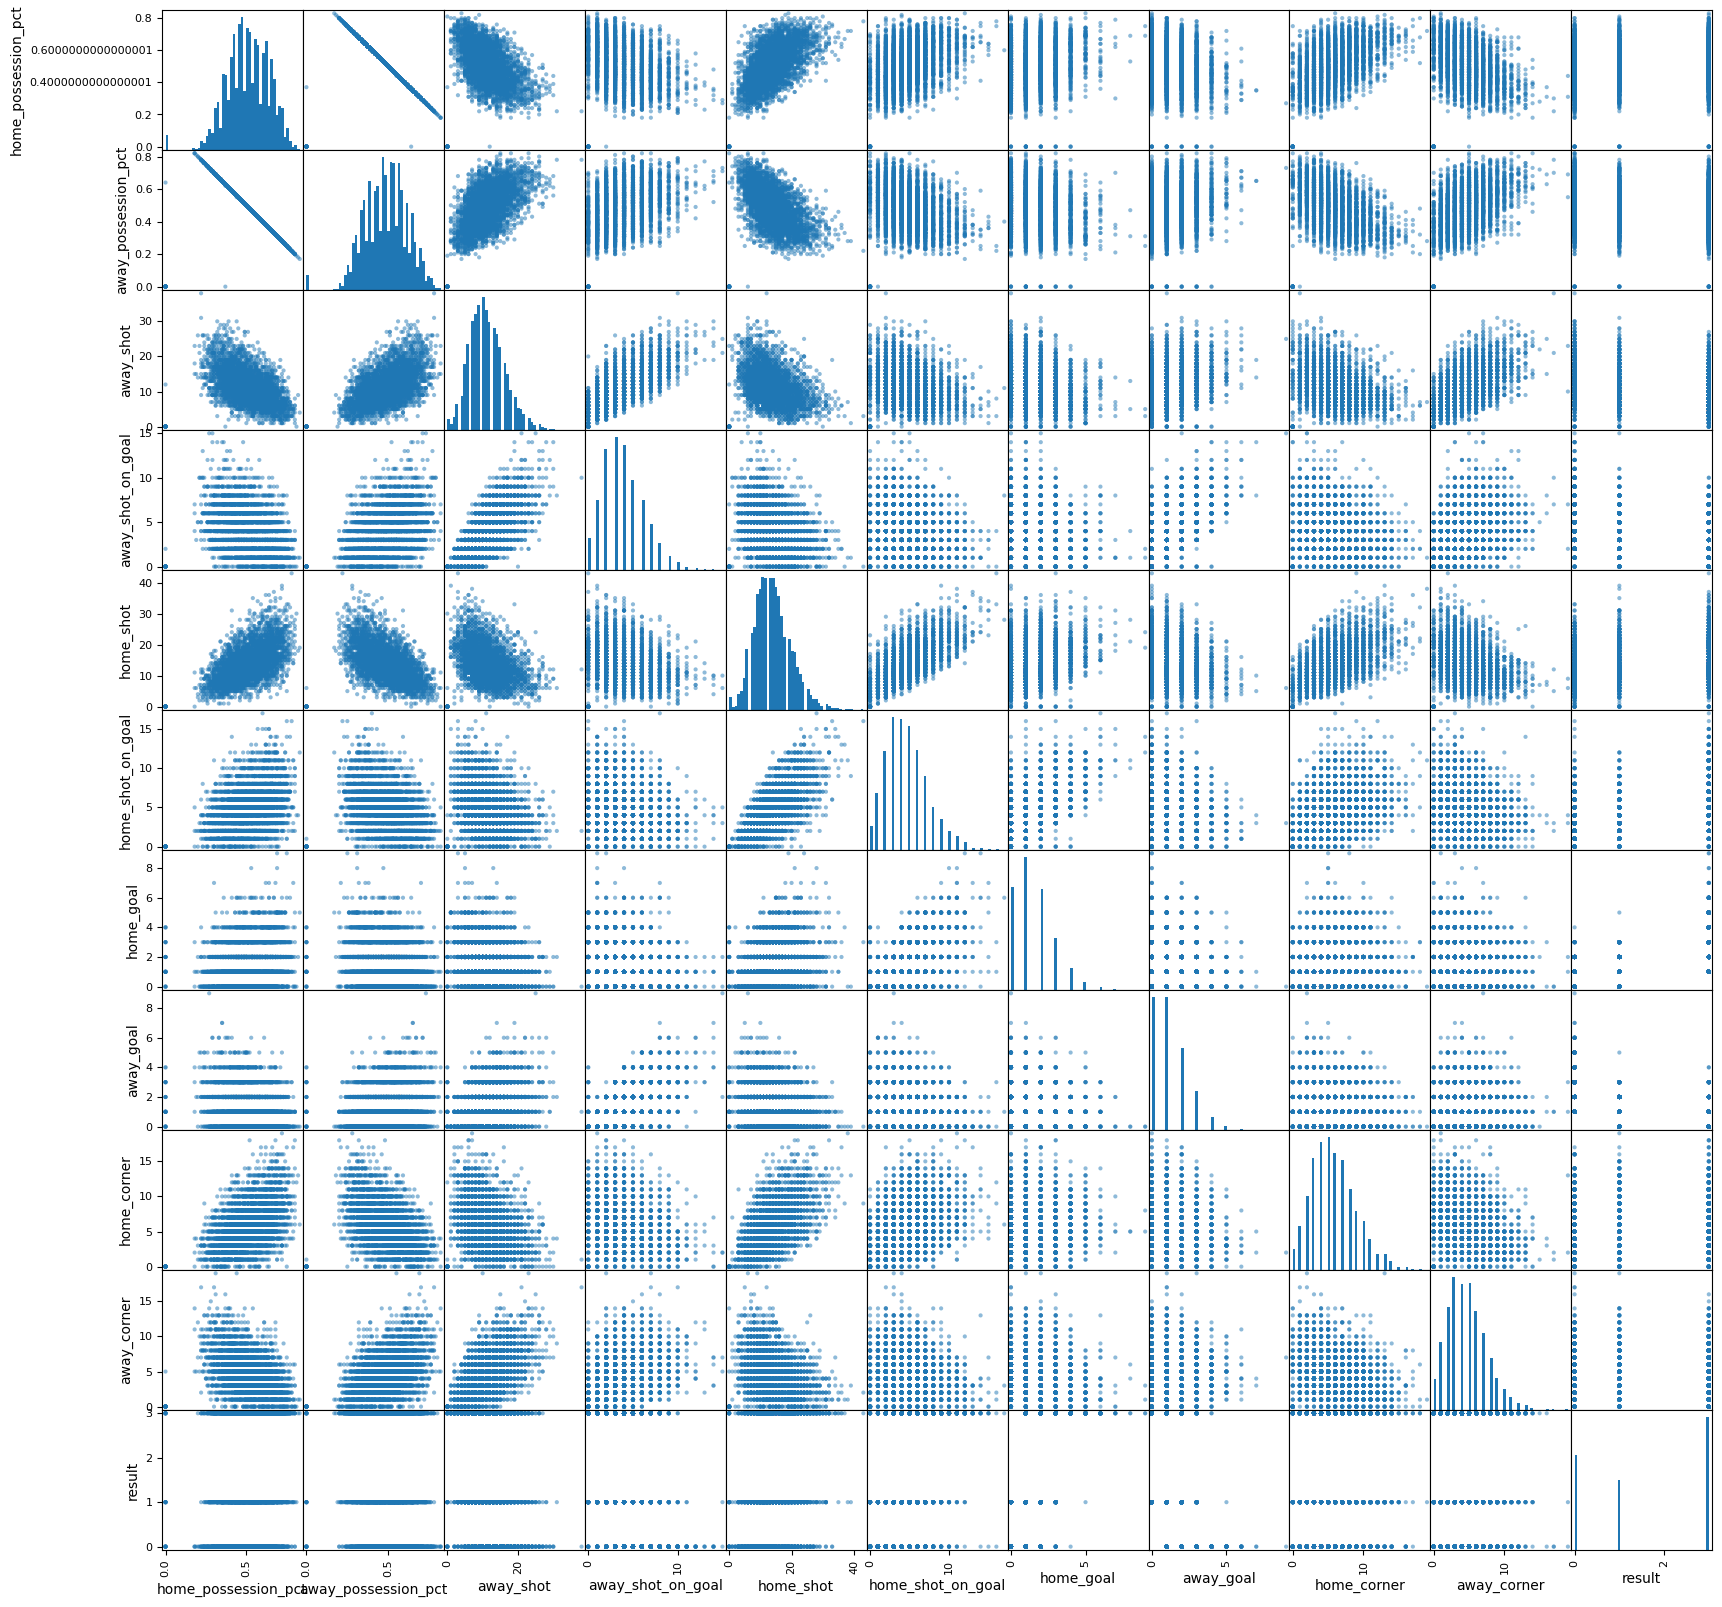

In [39]:
scatter_matrix(info, figsize=(20, 20), hist_kwds={'bins': 50})

array([[<AxesSubplot: title={'center': 'home_goal'}>,
        <AxesSubplot: title={'center': 'away_goal'}>,
        <AxesSubplot: title={'center': 'home_shot'}>],
       [<AxesSubplot: title={'center': 'away_shot'}>,
        <AxesSubplot: title={'center': 'home_shot_on_goal'}>,
        <AxesSubplot: title={'center': 'away_shot_on_goal'}>],
       [<AxesSubplot: title={'center': 'home_possession_pct'}>,
        <AxesSubplot: title={'center': 'away_possession_pct'}>,
        <AxesSubplot: title={'center': 'home_corner'}>],
       [<AxesSubplot: title={'center': 'away_corner'}>,
        <AxesSubplot: title={'center': 'result'}>, <AxesSubplot: >]],
      dtype=object)

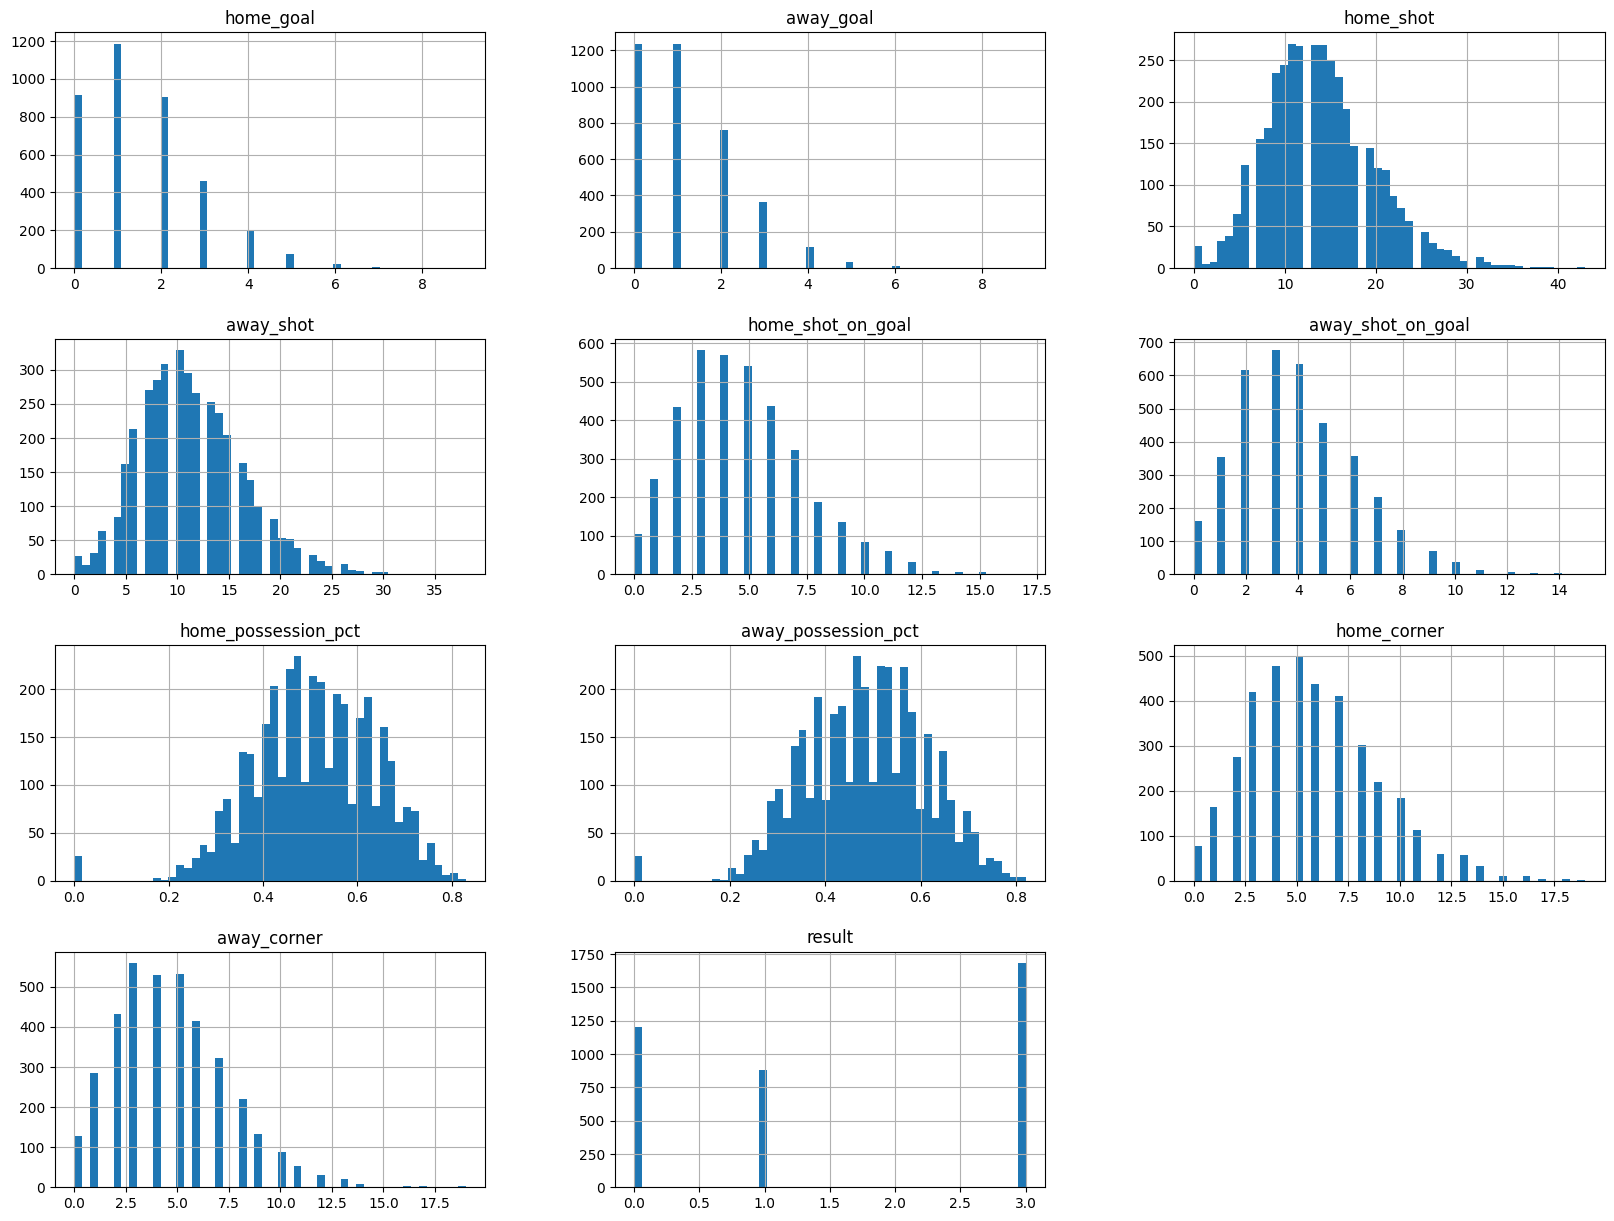

In [40]:
df_data.hist(bins=50, figsize=(20, 15))

A team at home has more numbers of 3 points (win) than away

Top correlation with result

In [41]:
df_data.corr(numeric_only=True)['result'].sort_values(ascending=False)

result                 1.000000
home_goal              0.657034
home_shot_on_goal      0.427052
home_shot              0.241733
home_possession_pct    0.140044
home_corner            0.068106
away_corner           -0.053918
away_possession_pct   -0.133396
away_shot             -0.259757
away_shot_on_goal     -0.396021
away_goal             -0.614953
Name: result, dtype: float64

In [42]:
df_data.head()

,date,home,away,home_goal,away_goal,home_shot,away_shot,home_shot_on_goal,away_shot_on_goal,home_possession_pct,away_possession_pct,home_corner,away_corner,result
0,2013-01-02,Newcastle United,Everton,1,2,17,13,5,6,0.50,0.50,4,6,0
1,2013-01-02,Liverpool,Sunderland,3,0,29,8,10,2,0.66,0.34,9,5,3
2,2013-01-02,Chelsea,Queens Park Rangers,0,1,26,7,2,3,0.64,0.36,14,2,0
3,2013-01-01,Southampton,Arsenal,1,1,9,6,5,1,0.44,0.56,3,3,1
4,2013-01-12,Sunderland,West Ham United,3,0,18,11,7,3,0.48,0.52,4,5,3


Make mean of 10 match later (home team from home matches and away team from away matches)

In [43]:
types = ['home', 'away']
df_mean = df_data.copy()

for type in types:
    gk = df_data.groupby(type)
    for team in df_mean[type].unique():
        temp = gk.get_group(team).sort_values('date', ascending=True)
        df_mean.loc[temp.index, [f'mean_10_{type}_goal']] = temp.rolling(10, min_periods=0)[f'{type}_goal'].mean()
        df_mean.loc[temp.index, [f'mean_10_{type}_possession_pct']] = temp.rolling(10, min_periods=0)[f'{type}_possession_pct'].mean()
        df_mean.loc[temp.index, [f'mean_10_{type}_shot_on_goal']] = temp.rolling(10, min_periods=0)[f'{type}_shot_on_goal'].mean()
        df_mean.loc[temp.index, [f'mean_10_{type}_shot']] = temp.rolling(10, min_periods=0)[f'{type}_shot'].mean()
        df_mean.loc[temp.index, [f'mean_10_{type}_corner']] = temp.rolling(10, min_periods=0)[f'{type}_corner'].mean()

df_mean.head()

,date,home,away,home_goal,away_goal,home_shot,away_shot,home_shot_on_goal,away_shot_on_goal,home_possession_pct,...,mean_10_home_goal,mean_10_home_possession_pct,mean_10_home_shot_on_goal,mean_10_home_shot,mean_10_home_corner,mean_10_away_goal,mean_10_away_possession_pct,mean_10_away_shot_on_goal,mean_10_away_shot,mean_10_away_corner
0,2013-01-02,Newcastle United,Everton,1,2,17,13,5,6,0.50,...,1.0,0.50,5.0,17.0,4.0,2.0,0.50,6.0,13.0,6.0
1,2013-01-02,Liverpool,Sunderland,3,0,29,8,10,2,0.66,...,3.0,0.66,10.0,29.0,9.0,0.0,0.34,2.0,8.0,5.0
2,2013-01-02,Chelsea,Queens Park Rangers,0,1,26,7,2,3,0.64,...,0.0,0.64,2.0,26.0,14.0,1.0,0.36,3.0,7.0,2.0
3,2013-01-01,Southampton,Arsenal,1,1,9,6,5,1,0.44,...,1.0,0.44,5.0,9.0,3.0,1.0,0.56,1.0,6.0,3.0
4,2013-01-12,Sunderland,West Ham United,3,0,18,11,7,3,0.48,...,3.0,0.48,7.0,18.0,4.0,0.0,0.52,3.0,11.0,5.0


Drop unnecessary columns

In [44]:
cols = ['date', 'home', 'away', 'home_possession_pct', 'away_possession_pct', 'away_shot', 'away_shot_on_goal', 'home_shot', 'home_shot_on_goal', 
    'home_goal', 'away_goal', 'home_corner', 'away_corner']
df_mean.drop(cols, axis=1, inplace=True)
df_mean.head()

,result,mean_10_home_goal,mean_10_home_possession_pct,mean_10_home_shot_on_goal,mean_10_home_shot,mean_10_home_corner,mean_10_away_goal,mean_10_away_possession_pct,mean_10_away_shot_on_goal,mean_10_away_shot,mean_10_away_corner
0,0,1.0,0.50,5.0,17.0,4.0,2.0,0.50,6.0,13.0,6.0
1,3,3.0,0.66,10.0,29.0,9.0,0.0,0.34,2.0,8.0,5.0
2,0,0.0,0.64,2.0,26.0,14.0,1.0,0.36,3.0,7.0,2.0
3,1,1.0,0.44,5.0,9.0,3.0,1.0,0.56,1.0,6.0,3.0
4,3,3.0,0.48,7.0,18.0,4.0,0.0,0.52,3.0,11.0,5.0


In [45]:
df_mean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3764 entries, 0 to 3763
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   result                       3764 non-null   int64  
 1   mean_10_home_goal            3764 non-null   float64
 2   mean_10_home_possession_pct  3764 non-null   float64
 3   mean_10_home_shot_on_goal    3764 non-null   float64
 4   mean_10_home_shot            3764 non-null   float64
 5   mean_10_home_corner          3764 non-null   float64
 6   mean_10_away_goal            3764 non-null   float64
 7   mean_10_away_possession_pct  3764 non-null   float64
 8   mean_10_away_shot_on_goal    3764 non-null   float64
 9   mean_10_away_shot            3764 non-null   float64
 10  mean_10_away_corner          3764 non-null   float64
dtypes: float64(10), int64(1)
memory usage: 323.6 KB


Top correlation with result

In [46]:
df_mean.corr(numeric_only=True)['result'].sort_values(ascending=False)

result                         1.000000
mean_10_home_goal              0.366753
mean_10_home_shot_on_goal      0.319478
mean_10_home_shot              0.267134
mean_10_home_possession_pct    0.234109
mean_10_home_corner            0.177976
mean_10_away_corner           -0.191158
mean_10_away_possession_pct   -0.221958
mean_10_away_shot             -0.268002
mean_10_away_shot_on_goal     -0.305438
mean_10_away_goal             -0.344851
Name: result, dtype: float64

Save analyzed data to csv file

In [47]:
df_mean.to_csv("../dataset/analyzed_data.csv", index=False)

Make all different of parameter column

In [48]:
df_mean['dif_goal'] = df_mean['mean_10_home_goal'] - df_mean['mean_10_away_goal']
df_mean['dif_possession'] = df_mean['mean_10_home_possession_pct'] - df_mean['mean_10_away_possession_pct']
df_mean['dif_shot_on_goal'] = df_mean['mean_10_home_shot_on_goal'] - df_mean['mean_10_away_shot_on_goal']
df_mean['dif_shot'] = df_mean['mean_10_home_shot'] - df_mean['mean_10_away_shot']
df_mean['dif_corner'] = df_mean['mean_10_home_corner'] - df_mean['mean_10_away_corner']
df_mean.drop(df_mean.iloc[:, 1:11], inplace=True, axis=1)
df_mean.head()

,result,dif_goal,dif_possession,dif_shot_on_goal,dif_shot,dif_corner
0,0,-1.0,0.00,-1.0,4.0,-2.0
1,3,3.0,0.32,8.0,21.0,4.0
2,0,-1.0,0.28,-1.0,19.0,12.0
3,1,0.0,-0.12,4.0,3.0,0.0
4,3,3.0,-0.04,4.0,7.0,-1.0


Save different data to csv file

In [49]:
df_mean.to_csv("../dataset/diff_data.csv", index=False)